<a href="https://colab.research.google.com/github/taha-shafique/mmai894/blob/main/Crack_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>
<font size='25'>
Crack Detection</font></b>
</h1>





**Download Data - Colab upload (Concrete_data.zip in local) and unzip**

In [ ]:
from datetime import datetime
start_time = datetime.now()

import os 
import cv2
os.getcwd()
import zipfile

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from PIL import Image
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from google.colab import drive
drive.mount('/content/drive')


#from google.colab import files
#uploaded = files.upload()



end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

#gs://894bucket


#uploaded = files.upload()


Mounted at /content/drive
Duration: 0:00:27.005580


In [ ]:
filepath =  'drive/MyDrive/MMAI 894 /concrete_crack_dataset'

from google.colab import auth
auth.authenticate_user()

project_id = 'mmai894-306223'
!gcloud config set project {project_id}

start_time = datetime.now()

!gsutil -m cp -r gs://mmai-bucket/concrete_crack_dataset .
!gsutil ls 'gs://mmai-bucket'

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Streaming output truncated to the last 5000 lines.
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15005_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15006_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15007_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15008_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15009_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15011_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15010_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15012_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15013_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15014_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15015_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15016_1.jpg...
Copying gs://mmai-bucket/concrete_crack_dataset/Positive/15017_1.jpg...
Copying gs://

**Data Visualization**

In [ ]:
end_time - start_time
2907/60

datetime.timedelta(seconds=2907, microseconds=708623)

48.45

In [ ]:
negative_images = sorted(os.listdir('concrete_crack_dataset/Negative'))[0:]
print("Negative images (n =",len(negative_images), "):", negative_images[:5])

positive_images = sorted(os.listdir('concrete_crack_dataset/Positive'))[0:]
print("Positive images (n =",len(positive_images), "):", positive_images[:5])

Negative images (n = 20000 ): ['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']
Positive images (n = 20000 ): ['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']


In [ ]:
print('Shape of Images : ',end='')
np.array(Image.open(f'concrete_crack_dataset/Negative/{positive_images[1]}')).shape

Shape of Images : 

(227, 227, 3)

### Images with Crack

Text(0.5, 0.98, 'Positive Images (Images with Cracks)')

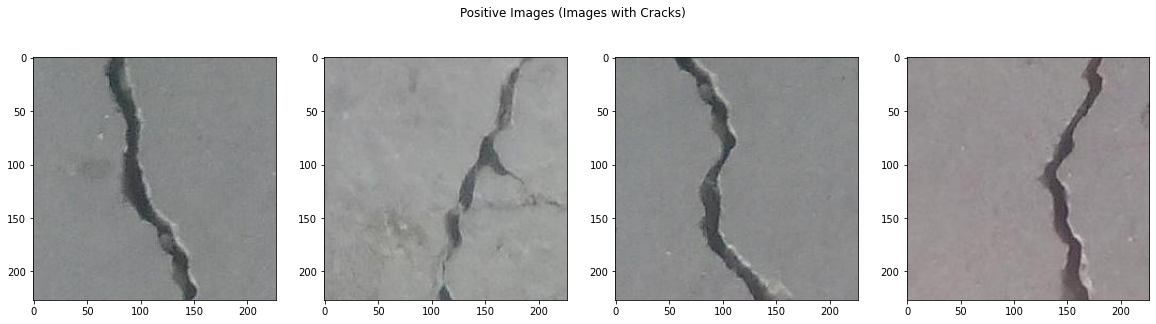

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) 
idx = 0
for ax in axs:
    image_data = Image.open(f'concrete_crack_dataset/Positive/{positive_images[idx]}')
    ax.imshow(image_data)
    idx += 1
fig.suptitle('Positive Images (Images with Cracks)') 
plt.show()

### Images without Crack

Text(0.5, 0.98, 'Negative Images (Images without cracks)')

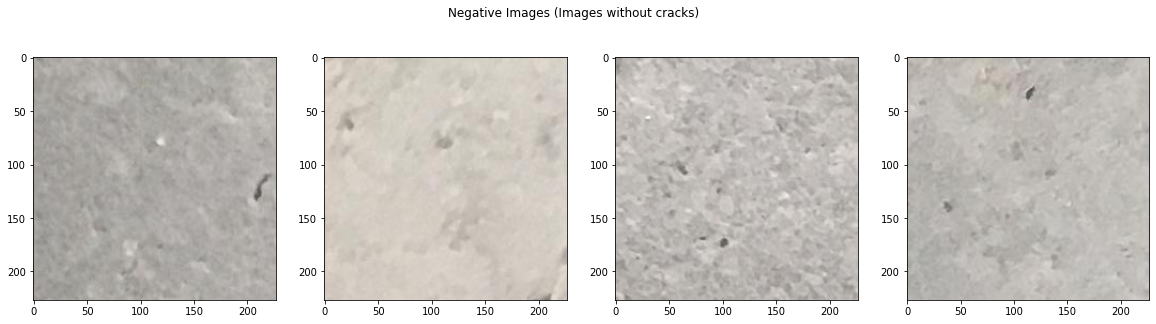

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) 
idx = 0
for ax in axs:
    image_data = Image.open(f'concrete_crack_dataset/Negative/{negative_images[idx]}')
    ax.imshow(image_data)
    idx += 1
fig.suptitle('Negative Images (Images without cracks)') 
plt.show()


## Training and Validation (Testing split not included intentionally for this exercise)

VGG16 pre-trained model based on DL Lecture notes (L3 - Slide 27)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

In [ ]:
full_data = data_generator.flow_from_directory('concrete_crack_dataset', target_size=(image_resize, image_resize),
    batch_size=batch_size_training, class_mode='categorical')

train_data = data_generator.flow_from_directory(
    'concrete_crack_dataset',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical',
    subset='training')

validation_data = data_generator.flow_from_directory(
    'concrete_crack_dataset',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical',
    subset='validation')

#print(train_generator)


Found 40000 images belonging to 2 classes.
Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='max',
    weights='imagenet',
    ))
model.add(Dense(10,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 14,719,840
Trainable params: 5,152
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
steps_per_epoch_training = len(train_data)
steps_per_epoch_validation = len(validation_data)
num_epochs = 2

In [ ]:
fit_history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_data,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
320/320 [==============================] - 140s 363ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.0117 - val_accuracy: 0.9959
Epoch 2/2
320/320 [==============================] - 105s 328ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0052 - val_accuracy: 0.9985


In [ ]:
epoch=fit_history.epoch
history=fit_history.history


AttributeError: ignored

In [ ]:
def load_images(folder_path):
  '''A function to load images into array format. The folder path must be provided'''
  data = []
  for i in os.listdir(folder_path):
    data.append(np.asarray(Image.open(folder_path+'/'+i)))
  data = np.asarray (data)

  return data

In [ ]:
positive = load_images('concrete_crack_dataset/Positive')
negative = load_images('concrete_crack_dataset/Negative')


In [ ]:
full_data.dtype

'float32'

In [ ]:
import sys 


In [ ]:
sys.getsizeof(full_data)

64

In [ ]:
train_d